In [1]:
import glob
import numpy as np
from PIL import Image
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from clevr_dataset import *
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Plotting the images from their png file -> np array -> plt.imshow.
# path = '../clevr-dataset-gen/output/'
# image_path = f"{path}images/"
# image_list = glob.glob(image_path + "*")
# for im_path in image_list:
#     pil_im = Image.open(im_path)
#     plt.imshow(np.asarray(pil_im))

In [4]:
clevr_dataset = CLEVRDataset('../clevr-dataset-gen/output/')

In [5]:
clevr_dataloader = torch.utils.data.DataLoader(dataset=clevr_dataset, batch_size=4, shuffle=True)

tensor([2., 1., 0.])


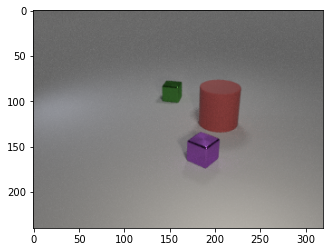

In [22]:
# Need to cast the array to int type, before calling plt.imshow
for i, data in enumerate(clevr_dataloader, 0):
    inputs, labels = data
    for im, lbl in zip(inputs, labels):
        plt.imshow(tensor_to_numpy(im.int()))
        print(lbl)

In [3]:
train_path = '../clevr-dataset-gen/output/images/'
image_list = glob.glob(train_path + "*")[:10]
pixel_num = 0
channel_sum = np.zeros(NUM_CHANNELS)
channel_sum_squared = np.zeros(NUM_CHANNELS)

for img_path in image_list:
    im = Image.open(img_path)
    im = im.convert('RGB')
    im = np.asarray(im).copy()
    im = im / 255.0
    pixel_num += (im.size/NUM_CHANNELS)
    channel_sum += np.sum(im, axis=(0,1)) # This sums across height, then width.
    channel_sum_squared += np.sum(np.square(im), axis=(0,1))
    
rgba_mean = channel_sum / pixel_num
rgba_std = np.sqrt(channel_sum_squared / pixel_num - np.square(rgba_mean))

In [6]:
train_path = '../../clevr-dataset-gen/output/images/'
rgb_mean, rgb_std = calc_trainset_mean_std(train_path)

100%|██████████| 10000/10000 [02:04<00:00, 80.62it/s]


In [4]:
rgb_mean = load_pickle("../pickle_files/rgb_mean.pickle")

In [6]:
rgb_std = load_pickle("../pickle_files/rgb_std.pickle")

In [7]:
rgb_std

array([0.09720527, 0.09439815, 0.09823581])

In [8]:
rgb_mean

array([0.46635221, 0.46281539, 0.4559737 ])

In [11]:
import torchvision.transforms as transforms
transform = transforms.Compose([
    transforms.ToTensor(), # Changes into (channels, rows, columns) and [0,1]
    transforms.Normalize(
        mean=rgb_mean,
        std=rgb_std,
    ),
])

In [51]:
train_path = '../../clevr-dataset-gen/output/'
clevr_dataset = CLEVRDataset(train_path)
clevr_dataloader = torch.utils.data.DataLoader(dataset=clevr_dataset, batch_size=4, shuffle=False)

In [52]:
im1, l1 = next(iter(clevr_dataloader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([5, 3, 2])
tensor([3, 3, 2])
tensor([0, 3, 2])
tensor([3, 1, 3])


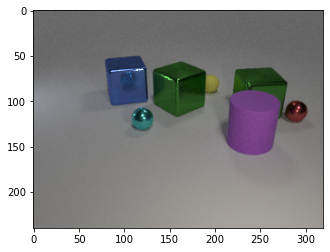

In [53]:
for im, l in zip(im1, l1):
    x = im * rgb_std[:, None, None] + rgb_mean[:, None, None]
    plt.imshow(x.numpy().transpose(1,2,0))
    
    print(l)

In [16]:
l1

tensor([[2, 2, 1],
        [0, 3, 2],
        [2, 1, 4],
        [0, 4, 1]])

In [18]:
im

tensor([[[-0.6019, -0.4002, -0.6019,  ..., -0.6019, -0.5616, -0.5616],
         [-0.5212, -0.4809, -0.7633,  ..., -0.8036, -0.5212, -0.8843],
         [-0.5212, -0.6423, -0.6423,  ..., -0.6826, -0.6423, -0.6019],
         ...,
         [-0.1581, -0.0371, -0.1178,  ...,  1.4556,  1.5766,  1.4556],
         [-0.0371, -0.1985, -0.0775,  ...,  1.5766,  1.4556,  1.4959],
         [-0.1178, -0.0371, -0.0775,  ...,  1.6170,  1.4959,  1.4959]],

        [[-0.6239, -0.3746, -0.5823,  ..., -0.5823, -0.5408, -0.5408],
         [-0.4993, -0.4993, -0.7485,  ..., -0.7901, -0.4993, -0.8731],
         [-0.5408, -0.6239, -0.6239,  ..., -0.6654, -0.6239, -0.5823],
         ...,
         [-0.1669, -0.0838, -0.0838,  ...,  1.4117,  1.5363,  1.3702],
         [-0.0423, -0.2085, -0.0838,  ...,  1.4948,  1.4117,  1.4533],
         [-0.1254, -0.0423, -0.1254,  ...,  1.5779,  1.4533,  1.4533]],

        [[-0.5299, -0.2903, -0.5299,  ..., -0.4899, -0.4500, -0.4500],
         [-0.4101, -0.4101, -0.6496,  ..., -0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


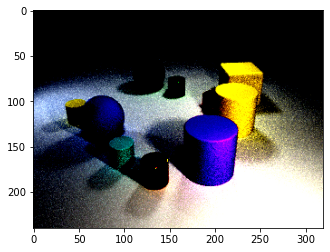

In [20]:
plt.imshow(np.array(im).transpose(1, 2, 0))

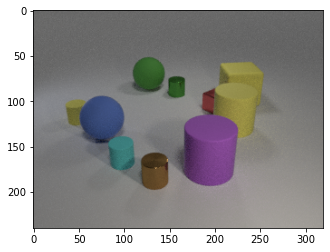

In [21]:
x = im * rgb_std[:, None, None] + rgb_mean[:, None, None]
plt.imshow(x.numpy().transpose(1,2,0))

In [22]:
rgb_std[:,None,None]

array([[[0.09720527]],

       [[0.09439815]],

       [[0.09823581]]])

In [23]:
rgb_mean[:,None,None]

array([[[0.46635221]],

       [[0.46281539]],

       [[0.4559737 ]]])

In [30]:
parse_objects_from_json('../../clevr-dataset-gen/output/scenes/CLEVR_new_009999.json')

array([2, 4, 1])

In [32]:
print(clevr_dataset.image_list[101])

../../clevr-dataset-gen/output/images/CLEVR_new_005978.png


In [34]:
print(clevr_dataset.label_list[101])

../../clevr-dataset-gen/output/scenes/CLEVR_new_009558.json
